# Descenso de Gradiente

Se puede encontrar además información en este artículo [Gradient Descent](https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

%matplotlib inline

### Generamos los datos y con las soluciones

Vamos a generar unos datos ficticios aleatorios de manera lineal, es decir, que sigan la siguiente forma:


$$
Y = \theta_1 * X + \theta_0 + random
$$

Tomemos para un ejemplo lo siguientes valores:
   

$$
 \theta_0= 4 , \theta_1= 3 
$$

Y generemos datos aleatorios

In [9]:
np.random.seed(32)
X = 2 * np.random.rand(100,1)
Y = 4 + 3 * X + np.random.randn(100,1)

Vamos a ver la pinta que tienen estos datos que hemos generado

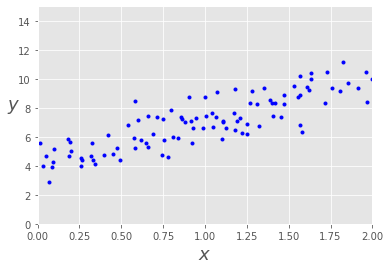

In [10]:
plt.plot(X,Y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

### Forma analítica de resolver

De esta manera lo que buscamos es resolver las soluciones $\theta_0$ y $\theta_1$ mediante matrices

Incluyendo la parte aleatoria como componente de de $\theta_0$ llegamos a:


$$
\left( \begin{array}{cc}
Y_1 \\ Y_2 \\ ... \\ Y_n
\end{array} \right) = \left( \begin{array}{cc}
\theta_0 & \theta_1
\end{array} \right) \left( \begin{array}{cc}
1 & 1 & ... & 1 \\
X_1 & X_2 & ... & X_n \end{array} \right)
$$

Para resolver primero multiplicamos a ambos lados por la traspuesta de X para tener una matriz cuadrada y con esto ya podemos calcular la inversa

In [ ]:
np.c_ -> np.concatenate

In [11]:
X_b = np.c_[np.ones((100,1)),X].T

In [12]:
X_b

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

In [15]:
np.linalg.det(X_b.dot(X_b.T)) != 0

True

In [18]:
np.linalg.inv(X_b.dot(X_b.T)).dot(X_b.dot(X_b.T))

array([[1., 0.],
       [0., 1.]])

In [23]:
theta_best = np.linalg.inv(X_b.dot(X_b.T)).dot(X_b).dot(Y)
print(theta_best)

[[4.16647368]
 [2.92394329]]


Para probar una predicción podemos hacer:

In [24]:
X_new = np.array([[0],[2]])

In [25]:
X_new

array([[0],
       [2]])

In [26]:
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16647368],
       [10.01436026]])

Vamos a pintarlo todo junto

[0, 2, 0, 15]

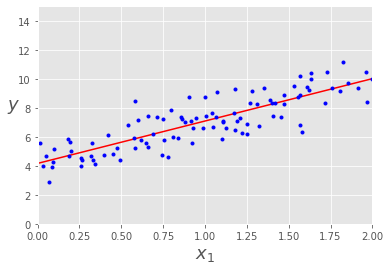

In [27]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,Y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


## Cálculo del Descenso de Gradiente

## Funcion de Coste y Gradientes

Las ecuaciones que nos encontramos aqui son las que se usan para el cálculo del descenso de gradiente en regresiones lineales. Esto es porque la función de coste $J(\theta)$ es la que se usa para estos algoritmos y los gradientes no dejan de ser las derivadas de estas funciones de coste; donde para otros algoritmos simplemente habría que derivar la función de coste y tendríamos los gradientes.

La función de coste es una función que buscamos optimizar para minimizar el error.

Los gradientes son la direcciones sobre las cuales queremos optimizar esta función de coste. (Referencia al ejemplo de la montaña)



<b>Funcion de coste</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradiente general regresiones lineales</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradientes</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [29]:
# Creamos una función que calcule el coste

def  cal_cost(theta, X, y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [31]:
# Creamos una funcion que calcule el descenso de gradiente
# Explicar que es el learning_rate
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

Empecemos con 1000 iteraciones y un learning rate de 0.01

In [62]:
lr = .01
n_iter = 1000

theta = np.random.randn(2,1) # Empezamos con unos valores aleatorios que vamos a ir optimizando por este método
X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,Y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.008,
Theta1:          3.064
Final cost/MSE:  4771.918


<h3> Let's plot the cost history over iterations

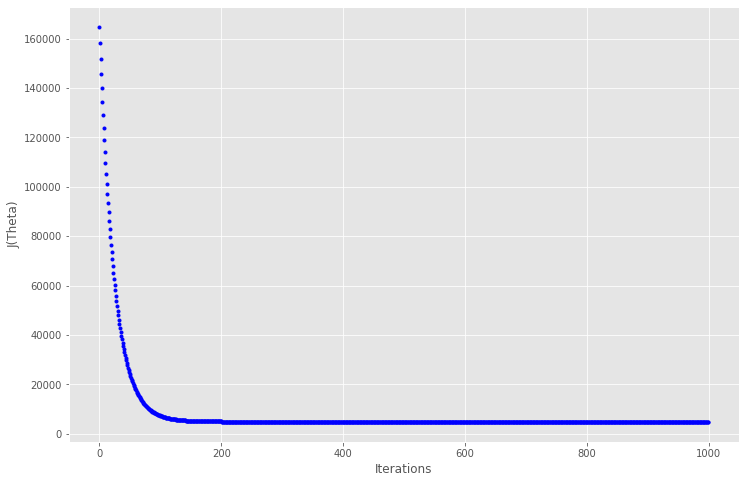

In [53]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')


Si nos fijamos a partir de aproximadamente 150 iteraciones la funcion de coste de aplana por lo que sucesivas iteraciones no aportan mayor optimización

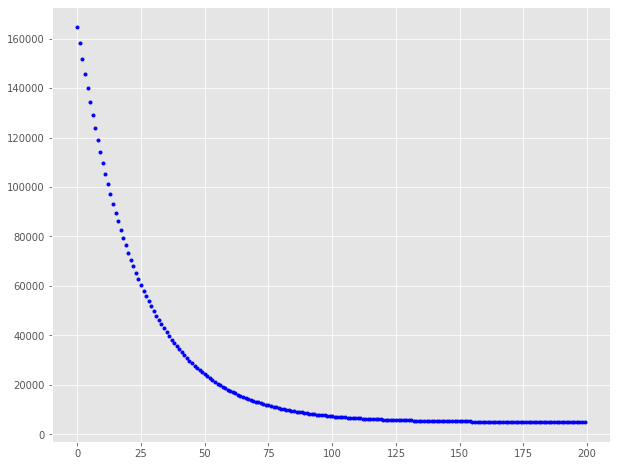

In [54]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

Podemos ver como inicialmente baja muy rapido y luego le cuesta más aprender

Veamos como hace el aprendizaje

In [58]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
    _ = ax.plot(X,Y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,Y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

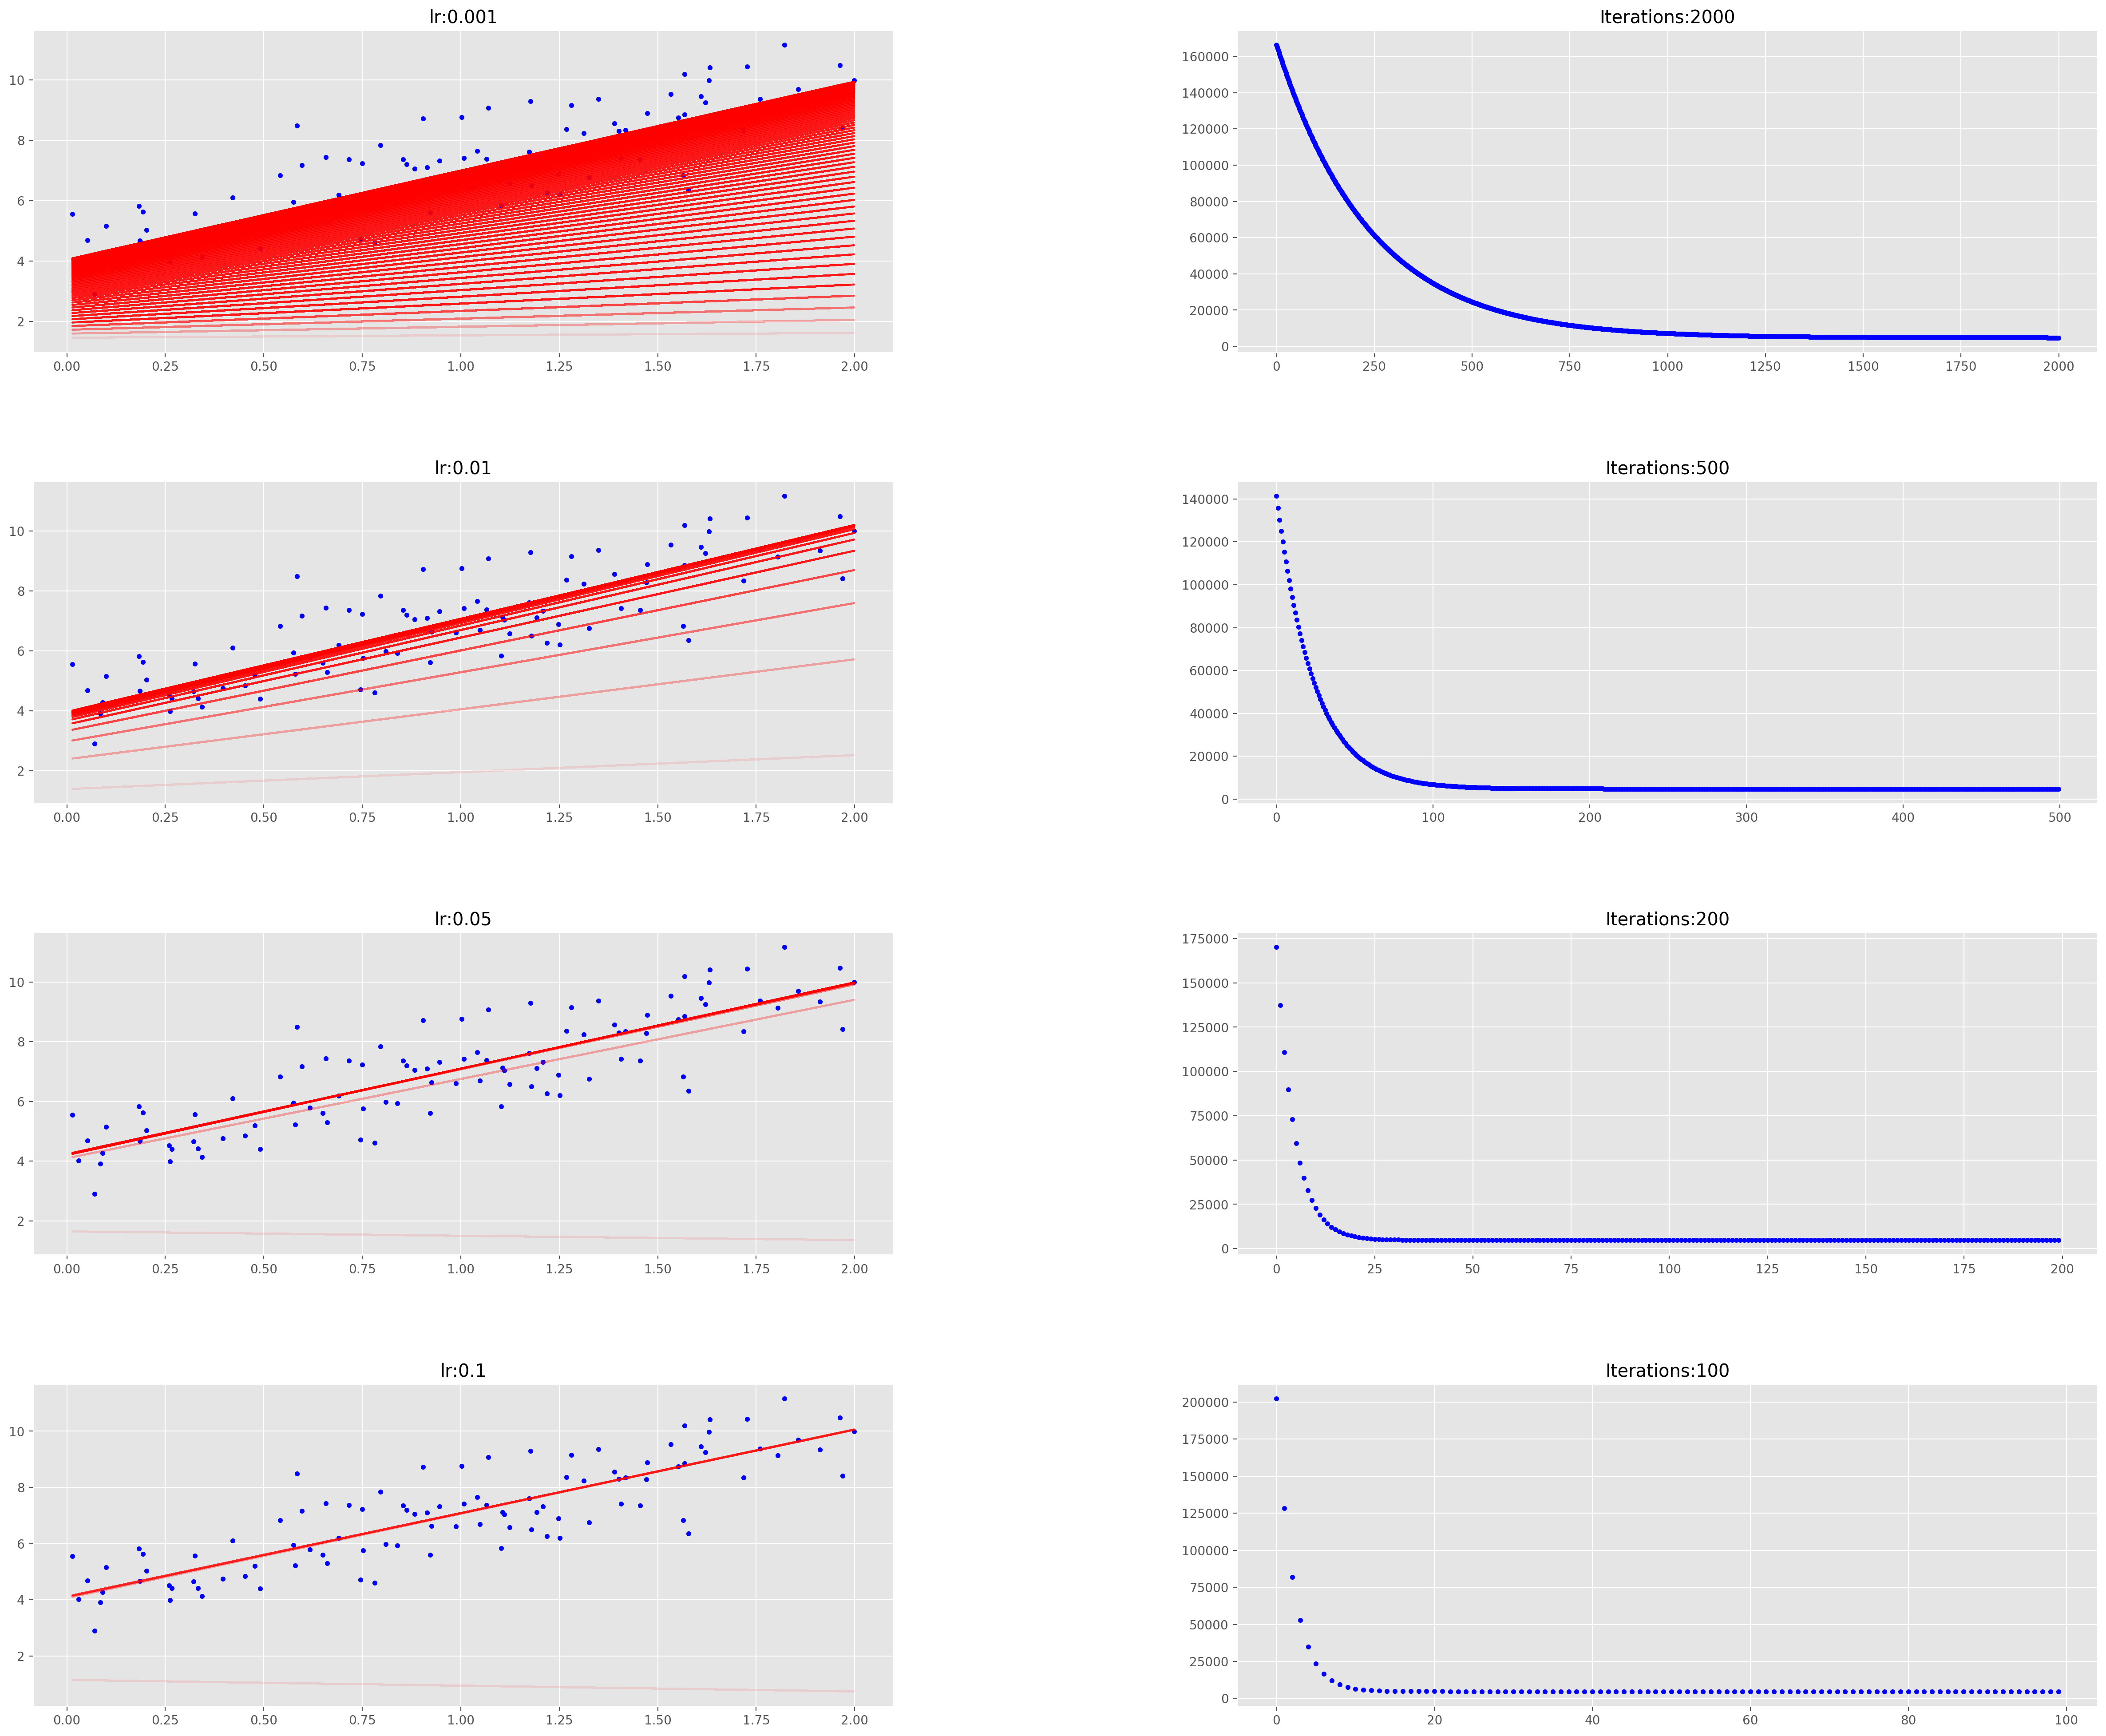

In [63]:
fig = plt.figure(figsize=(30,25),dpi=200)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    